In [1]:
import os 
import warnings
warnings.filterwarnings("ignore")
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import datetime as dt

# Gold DataSet

In [2]:
dfG = pd.read_csv(r"C:\Users\Dell\OneDrive\My_UNI\Projects\PrLSTM\DataSet\Gold.csv")
dfG.head()

,0,1
0,Date,Gold Price per Gram
1,Current Price,31588.4 LKR
2,29-Apr-2025,31901.6 LKR
3,28-Apr-2025,32157.5 LKR
4,27-Apr-2025,31880.4 LKR


In [3]:
dfG.columns = dfG.iloc[0]

In [4]:
dfG.drop([0,1], inplace=True)

In [5]:
dfG.head()

,Date,Gold Price per Gram
2,29-Apr-2025,31901.6 LKR
3,28-Apr-2025,32157.5 LKR
4,27-Apr-2025,31880.4 LKR
5,26-Apr-2025,31880.4 LKR
6,25-Apr-2025,31880.4 LKR


In [6]:
dfG['Date'] = pd.to_datetime(dfG['Date']).dt.date

In [7]:
dfG.columns

Index(['Date', 'Gold Price per Gram'], dtype='object', name=0)

In [8]:
dfG.rename(columns ={'Gold Price per Gram':'GoldPricePerGram'}, inplace=True)

In [9]:
dfG["GoldPricePerGram"] = dfG["GoldPricePerGram"].str.replace(r" LKR","",regex=True).astype(float)

In [10]:
dfG.isnull().sum()

0
Date                0
GoldPricePerGram    0
dtype: int64

In [11]:
dfG.head()

,Date,GoldPricePerGram
2,2025-04-29,31901.6
3,2025-04-28,32157.5
4,2025-04-27,31880.4
5,2025-04-26,31880.4
6,2025-04-25,31880.4


# Petrol Data

In [12]:
dfP = pd.read_csv(r"C:\Users\Dell\OneDrive\My_UNI\Projects\PrLSTM\DataSet\Petrol.csv")
dfP.head()

,0,1,2,3,4,5,6,7,8,9
0,NaN,LP 95,LP 92,LAD,LSD,LK,LIK,FUR. 800,FUR 1500 (High),FUR. 1500 (Low)
1,01.04.2025,361,299,286,331,183,191,207,207,207
2,01.02.2025,371,309,286,331,183,191,207,207,207
3,01.01.2025,371,309,286,313,183,191,207,207,207
4,05.12.2024,371,309,286,313,188,196,207,207,207


In [13]:
dfP.columns = dfP.iloc[0]

In [14]:
dfP.drop(0, inplace=True)

In [15]:
dfP.columns

Index([              nan,           'LP 95',           'LP 92',
                   'LAD',             'LSD',              'LK',
                   'LIK',        'FUR. 800', 'FUR 1500 (High)',
       'FUR. 1500 (Low)'],
      dtype='object', name=0)

In [16]:
dfP.rename(columns={np.nan:'Date'}, inplace=True)

In [17]:
dfP.columns

Index(['Date', 'LP 95', 'LP 92', 'LAD', 'LSD', 'LK', 'LIK', 'FUR. 800',
       'FUR 1500 (High)', 'FUR. 1500 (Low)'],
      dtype='object', name=0)

In [18]:
dfP = dfP.drop(['LAD', 'LSD', 'LK', 'LIK', 'FUR. 800',
       'FUR 1500 (High)', 'FUR. 1500 (Low)'], axis = 1)

In [19]:
dfP.head()

,Date,LP 95,LP 92
1,01.04.2025,361,299
2,01.02.2025,371,309
3,01.01.2025,371,309
4,05.12.2024,371,309
5,01.12.2024,371,309


In [20]:
dfP['Date'] = pd.to_datetime(dfP['Date'], dayfirst=True, errors='coerce').dt.date

In [21]:
dfP.head()

,Date,LP 95,LP 92
1,2025-04-01,361,299
2,2025-02-01,371,309
3,2025-01-01,371,309
4,2024-12-05,371,309
5,2024-12-01,371,309


In [22]:
dfP.isnull().sum()

0
Date     1
LP 95    0
LP 92    0
dtype: int64

In [23]:
dfP.dropna(inplace=True)

# Gold + Petrol Data

In [24]:
dfG = dfG.sort_values('Date')

In [25]:
dfG.head()

,Date,GoldPricePerGram
3160,2016-01-01,4907.4
3159,2016-01-04,5025.5
3158,2016-01-05,4974.7
3157,2016-01-06,5051.7
3156,2016-01-07,5112.0


In [26]:
dfG.shape

(3159, 2)

In [27]:
dfP = dfP.sort_values('Date')

In [28]:
dfP.head()

,Date,LP 95,LP 92
161,1990-03-01,22,20
160,1990-08-14,27,25
159,1990-11-05,38,35
158,1990-12-26,32.5,30
157,1991-01-01,32.5,30


In [29]:
dfP.shape

(160, 3)

In [30]:
df1 = pd.merge(dfG, dfP, on='Date',how='left')

In [31]:
df1[['LP 95', 'LP 92']] = df1[['LP 95', 'LP 92']].fillna(method='ffill')

In [32]:
df1.head()

,Date,GoldPricePerGram,LP 95,LP 92
0,2016-01-01,4907.4,NaN,NaN
1,2016-01-04,5025.5,NaN,NaN
2,2016-01-05,4974.7,NaN,NaN
3,2016-01-06,5051.7,NaN,NaN
4,2016-01-07,5112.0,NaN,NaN


In [33]:
df1.isnull().sum()

0
Date                  0
GoldPricePerGram      0
LP 95               613
LP 92               613
dtype: int64

In [34]:
df1[df1.isnull().any(axis=1)]

,Date,GoldPricePerGram,LP 95,LP 92
0,2016-01-01,4907.4,NaN,NaN
1,2016-01-04,5025.5,NaN,NaN
2,2016-01-05,4974.7,NaN,NaN
3,2016-01-06,5051.7,NaN,NaN
4,2016-01-07,5112.0,NaN,NaN
...,...,...,...,...
608,2018-05-06,6655.3,NaN,NaN
609,2018-05-07,6644.4,NaN,NaN
610,2018-05-08,6646.8,NaN,NaN
611,2018-05-09,6657.7,NaN,NaN


#### Fill the missing petrol price by getting average price ofLP 92 and 95 from 2016 to 2018 May

In [35]:
dfP2 =dfP.copy()

In [36]:
dfP2['Date'] = pd.to_datetime(dfP2['Date'])  # this keeps it as datetime64

In [37]:
df_2016 = dfP2[dfP2['Date'].dt.year == 2015]
df_2016

,Date,LP 95,LP 92
73,2015-01-01,158,150
72,2015-01-22,128,117
71,2015-01-29,128,117
70,2015-11-28,128,117


In [38]:
df_2015_2019 = dfP2[(dfP2['Date'].dt.year >= 2015) & (dfP2['Date'].dt.year < 2019)]
df_2015_2019

,Date,LP 95,LP 92
73,2015-01-01,158,150
72,2015-01-22,128,117
71,2015-01-29,128,117
70,2015-11-28,128,117
69,2018-05-11,148,137
68,2018-06-13,148,137
67,2018-07-11,155,145
66,2018-08-11,157,145
65,2018-09-04,157,145
64,2018-09-11,161,149


In [39]:
df_2015_2019.loc[df_2015_2019['Date'] == '2018-05-11',  ['LP 95', 'LP 92']] = [148.00, 137.00]

In [40]:
pet_mean=df_2015_2019.iloc[3:5,:]
pet_mean

,Date,LP 95,LP 92
70,2015-11-28,128,117
69,2018-05-11,148.0,137.0


In [41]:
pet_mean.dtypes

0
Date     datetime64[ns]
LP 95            object
LP 92            object
dtype: object

In [42]:
col = ['LP 95', 'LP 92']
pet_mean[col]=pet_mean[col].astype('float')

In [43]:
pet_mean.describe()

,Date,LP 95,LP 92
count,2,2.000000,2.000000
mean,2017-02-17 12:00:00,138.000000,127.000000
min,2015-11-28 00:00:00,128.000000,117.000000
25%,2016-07-08 18:00:00,133.000000,122.000000
50%,2017-02-17 12:00:00,138.000000,127.000000
75%,2017-09-29 06:00:00,143.000000,132.000000
max,2018-05-11 00:00:00,148.000000,137.000000
std,NaN,14.142136,14.142136


In [44]:
# Accroding to "http://laugfspetroleum.lk/fuel.php" current 92 and 95 petrol price is 293 and 340LKR but we need to fill past year values
df1.fillna(value = {'LP 95':138.00, 'LP 92' : 127.00},inplace=True)

In [45]:
df1.isnull().sum()

0
Date                0
GoldPricePerGram    0
LP 95               0
LP 92               0
dtype: int64

In [46]:
df1.loc[df1['Date'] == '2018-05-11',  ['LP 95', 'LP 92']] = [148.00, 137.00]

In [47]:
df1.head()

,Date,GoldPricePerGram,LP 95,LP 92
0,2016-01-01,4907.4,138.0,127.0
1,2016-01-04,5025.5,138.0,127.0
2,2016-01-05,4974.7,138.0,127.0
3,2016-01-06,5051.7,138.0,127.0
4,2016-01-07,5112.0,138.0,127.0


# USD Exchange Rate

In [48]:
dfU = pd.read_csv(r"C:\Users\Dell\OneDrive\My_UNI\Projects\PrLSTM\DataSet\USD_LKR Historical Data.csv")
dfU.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,04/30/2025,299.446,299.446,299.446,299.446,NaN,-0.02%
1,04/29/2025,299.500,299.450,299.650,299.450,NaN,-0.03%
2,04/28/2025,299.600,299.550,299.775,299.475,NaN,0.00%
3,04/25/2025,299.600,299.800,299.850,299.450,NaN,-0.12%
4,04/24/2025,299.950,299.700,300.200,299.700,NaN,0.08%


In [49]:
dfU.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

In [50]:
dfU=dfU.drop(['Open', 'High', 'Low', 'Vol.', 'Change %'], axis=1)

In [51]:
dfU['Date']= pd.to_datetime(dfU['Date']).dt.date

In [52]:
dfU.rename(columns = {'Price':'USDRate'}, inplace=True)

In [53]:
dfU = dfU.sort_values('Date')

In [54]:
dfU.head()

,Date,USDRate
2356,2016-02-01,143.880
2355,2016-02-02,144.085
2354,2016-02-03,144.250
2353,2016-02-04,144.020
2352,2016-02-05,144.090


In [55]:
dfU.isnull().sum()

Date       0
USDRate    0
dtype: int64

# Final Data = Gold + Petrol + USD Rate

In [56]:
df = pd.merge(df1, dfU, on='Date',how='left')

In [57]:
df.head()

,Date,GoldPricePerGram,LP 95,LP 92,USDRate
0,2016-01-01,4907.4,138.0,127.0,NaN
1,2016-01-04,5025.5,138.0,127.0,NaN
2,2016-01-05,4974.7,138.0,127.0,NaN
3,2016-01-06,5051.7,138.0,127.0,NaN
4,2016-01-07,5112.0,138.0,127.0,NaN


In [58]:
df[['USDRate']] = df[['USDRate']].fillna(method='ffill')

In [59]:
df.isnull().sum()

Date                 0
GoldPricePerGram     0
LP 95                0
LP 92                0
USDRate             21
dtype: int64

In [60]:
df[df.isnull().any(axis=1)]

,Date,GoldPricePerGram,LP 95,LP 92,USDRate
0,2016-01-01,4907.4,138.0,127.0,NaN
1,2016-01-04,5025.5,138.0,127.0,NaN
2,2016-01-05,4974.7,138.0,127.0,NaN
3,2016-01-06,5051.7,138.0,127.0,NaN
4,2016-01-07,5112.0,138.0,127.0,NaN
5,2016-01-08,5095.5,138.0,127.0,NaN
6,2016-01-11,5058.6,138.0,127.0,NaN
7,2016-01-12,5014.5,138.0,127.0,NaN
8,2016-01-13,5021.3,138.0,127.0,NaN
9,2016-01-14,5028.1,138.0,127.0,NaN


In [61]:
# Jan USD Rate = 'https://www.exchangerates.org.uk/USD-LKR-spot-exchange-rates-history-2016.html'
df.fillna(value = {'USDRate':144.00},inplace=True)

In [62]:
df.isnull().sum()

Date                0
GoldPricePerGram    0
LP 95               0
LP 92               0
USDRate             0
dtype: int64

In [63]:
df.head()

,Date,GoldPricePerGram,LP 95,LP 92,USDRate
0,2016-01-01,4907.4,138.0,127.0,144.0
1,2016-01-04,5025.5,138.0,127.0,144.0
2,2016-01-05,4974.7,138.0,127.0,144.0
3,2016-01-06,5051.7,138.0,127.0,144.0
4,2016-01-07,5112.0,138.0,127.0,144.0


In [64]:
df.shape

(3159, 5)

In [67]:
df.columns

Index(['Date', 'GoldPricePerGram', 'LP 95', 'LP 92', 'USDRate'], dtype='object')

In [69]:
df.dtypes

Date                 object
GoldPricePerGram    float64
LP 95                object
LP 92                object
USDRate             float64
dtype: object

In [70]:
col = ['LP 95', 'LP 92']
df[col]=df[col].astype('float')

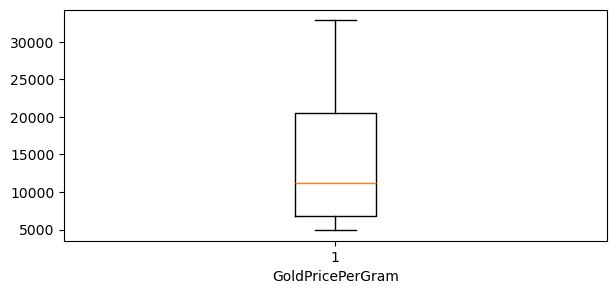

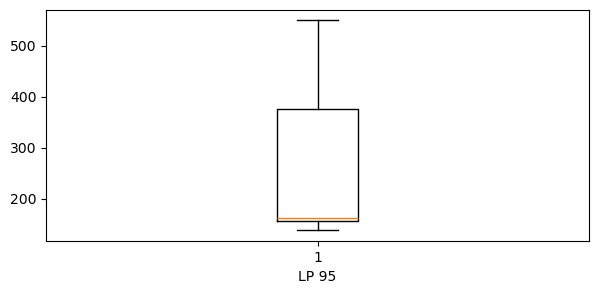

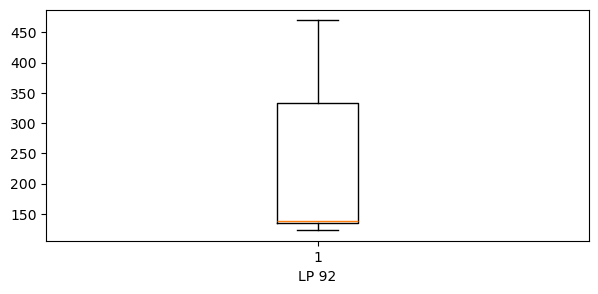

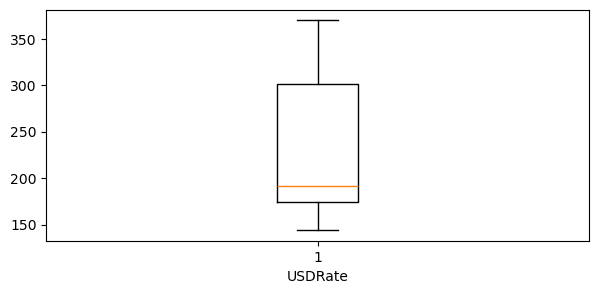

In [72]:
numvar = ['GoldPricePerGram', 'LP 95', 'LP 92', 'USDRate']
for i in numvar:
    plt.figure(figsize=(7,3))
    plt.boxplot(df[i])
    plt.xlabel(i)
    plt.show()

# Get the cleaned FINAL Data

In [65]:
df.to_csv("CleanedData.csv")